In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\n\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# Auxiliary Functions that may be used
Knowing the images are in the directory /kaggle/input/isic-2024-challenge/train-image. We should use the metadata of the image to create a dataframe

In [2]:
import cv2

#All of this functions are retrieved from a previous academic proyect developted by me

def obtener_info_imagen(path:str) -> dict:
    """
    Función que obtiene la información de una imagen en formato diccionario.
    Args:
    path: str: Ruta de la imagen.
    Returns:
    dict: Diccionario con la información de la imagen.
    """
    ret = {}
    img = cv2.imread(path)
    alto, ancho, canales = img.shape #Obtener dimensiones y canales de color
    typo_img = img.dtype #Obtener tipo de datos de la imagen
    espacio = obtener_espacio_color(cv2.cvtColor(img, cv2.COLOR_BGR2RGB).shape[2])
    #Crear primera parte del dataframe
    ret['Alto'] = alto
    ret['Ancho'] = ancho
    ret['Canales'] = canales
    ret['Tipo_IMG'] = typo_img
    ret['Espacio_color'] = espacio
    
    #Si es RGB se obtiene la información de cada canal
    if espacio == 'RGB' and canales == 3:
        b, g, r = cv2.split(img)
        color_data = []
        for i, col in enumerate([b, g, r]):
            indicador = ['azul', 'verde', 'rojo'][i]
            color_stats = {
                'canal': indicador,
                'min': int(np.min(col)),
                'max': int(np.max(col)),
                'media': float(np.mean(col)),
                'desviacion_std': float(np.std(col)),
                #'valores': col.ravel().tolist()  # Lista de valores de píxeles 256x256
            }
            color_data.append(color_stats)
        for color in color_data:
            ret[f"Canal_{color['canal']}_MAX"] = color['max']
            ret[f"Canal_{color['canal']}_MIN"] = color['min']
            ret[f"Canal_{color['canal']}_MEDIA"] = color['media']
            ret[f"Canal_{color['canal']}_DESVIACION"] = color['desviacion_std']
        ret["Path"] = path
        return ret
    else:
        print(f"No se puede obtener información de los canales de color de la imagen {path} ya que no es RGB")
        return None
    


def obtener_espacio_color(espacio:int) -> str:
    if espacio == 1:
        color_space = "Escala de grises"
    elif espacio == 3:
        color_space = "RGB"
    elif espacio == 4:
        color_space = "RGBA" # RGB con canal alfa (transparencia)
    else:
        color_space = "Espacio de color desconocido (ni grises, ni RGB, ni RGBA)"
    return color_space

def list_all_files(root):
    """
    Recorre todos los directorios a partir de una carpeta principal
    y lista todos los archivos encontrados.
    
    Args:
        root_dir (str): Ruta a la carpeta principal.
    Returns:
    list: Lista con las rutas de todos los archivos encontrados.
    """
    ret = []
    for root, dict, files in os.walk(root):
        for file in files:
            file_path = os.path.join(root, file)
            ret.append(file_path)
    return ret

In [3]:
#Determine how many image files are in the train-image directory
li = list_all_files("/kaggle/input/isic-2024-challenge/train-image")
print(f"Hay {len(li)} imagenes en el repositorio")
del li

Hay 401059 imagenes en el repositorio


## Creation of an RGB dataframe use the following code snippet

In [4]:
#Creation of dataframe with auxiliary function
proto_df = []
img_list = list_all_files("/kaggle/input/isic-2024-challenge/train-image")
for img_path in img_list:
    reporte = obtener_info_imagen(img_path)
    if reporte is not None:
        proto_df.append(reporte)
del img_list
df = pd.DataFrame(proto_df)
df.head(5)

,Alto,Ancho,Canales,Tipo_IMG,Espacio_color,Canal_azul_MAX,Canal_azul_MIN,Canal_azul_MEDIA,Canal_azul_DESVIACION,Canal_verde_MAX,Canal_verde_MIN,Canal_verde_MEDIA,Canal_verde_DESVIACION,Canal_rojo_MAX,Canal_rojo_MIN,Canal_rojo_MEDIA,Canal_rojo_DESVIACION,Path
0,139,139,3,uint8,RGB,113,12,72.979297,10.350905,143,36,105.711350,10.930322,184,96,153.133378,8.767306,/kaggle/input/isic-2024-challenge/train-image/...
1,125,125,3,uint8,RGB,189,84,168.443072,11.398211,227,114,202.499392,11.918615,255,191,249.279424,7.286687,/kaggle/input/isic-2024-challenge/train-image/...
2,123,123,3,uint8,RGB,154,47,124.944808,13.910379,194,86,165.166898,13.449365,244,152,220.044616,9.901534,/kaggle/input/isic-2024-challenge/train-image/...
3,115,115,3,uint8,RGB,185,81,143.810284,11.467027,202,89,155.953573,11.246102,230,136,193.665558,9.372226,/kaggle/input/isic-2024-challenge/train-image/...
4,147,147,3,uint8,RGB,89,4,61.791244,8.822244,113,31,86.327502,8.987786,157,82,132.443426,8.964988,/kaggle/input/isic-2024-challenge/train-image/...


# Explore Both DataFrames (EDA)

## Image Size Dataframe

In [5]:
df.info() #General Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Alto                    401059 non-null  int64  
 1   Ancho                   401059 non-null  int64  
 2   Canales                 401059 non-null  int64  
 3   Tipo_IMG                401059 non-null  object 
 4   Espacio_color           401059 non-null  object 
 5   Canal_azul_MAX          401059 non-null  int64  
 6   Canal_azul_MIN          401059 non-null  int64  
 7   Canal_azul_MEDIA        401059 non-null  float64
 8   Canal_azul_DESVIACION   401059 non-null  float64
 9   Canal_verde_MAX         401059 non-null  int64  
 10  Canal_verde_MIN         401059 non-null  int64  
 11  Canal_verde_MEDIA       401059 non-null  float64
 12  Canal_verde_DESVIACION  401059 non-null  float64
 13  Canal_rojo_MAX          401059 non-null  int64  
 14  Canal_rojo_MIN      

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

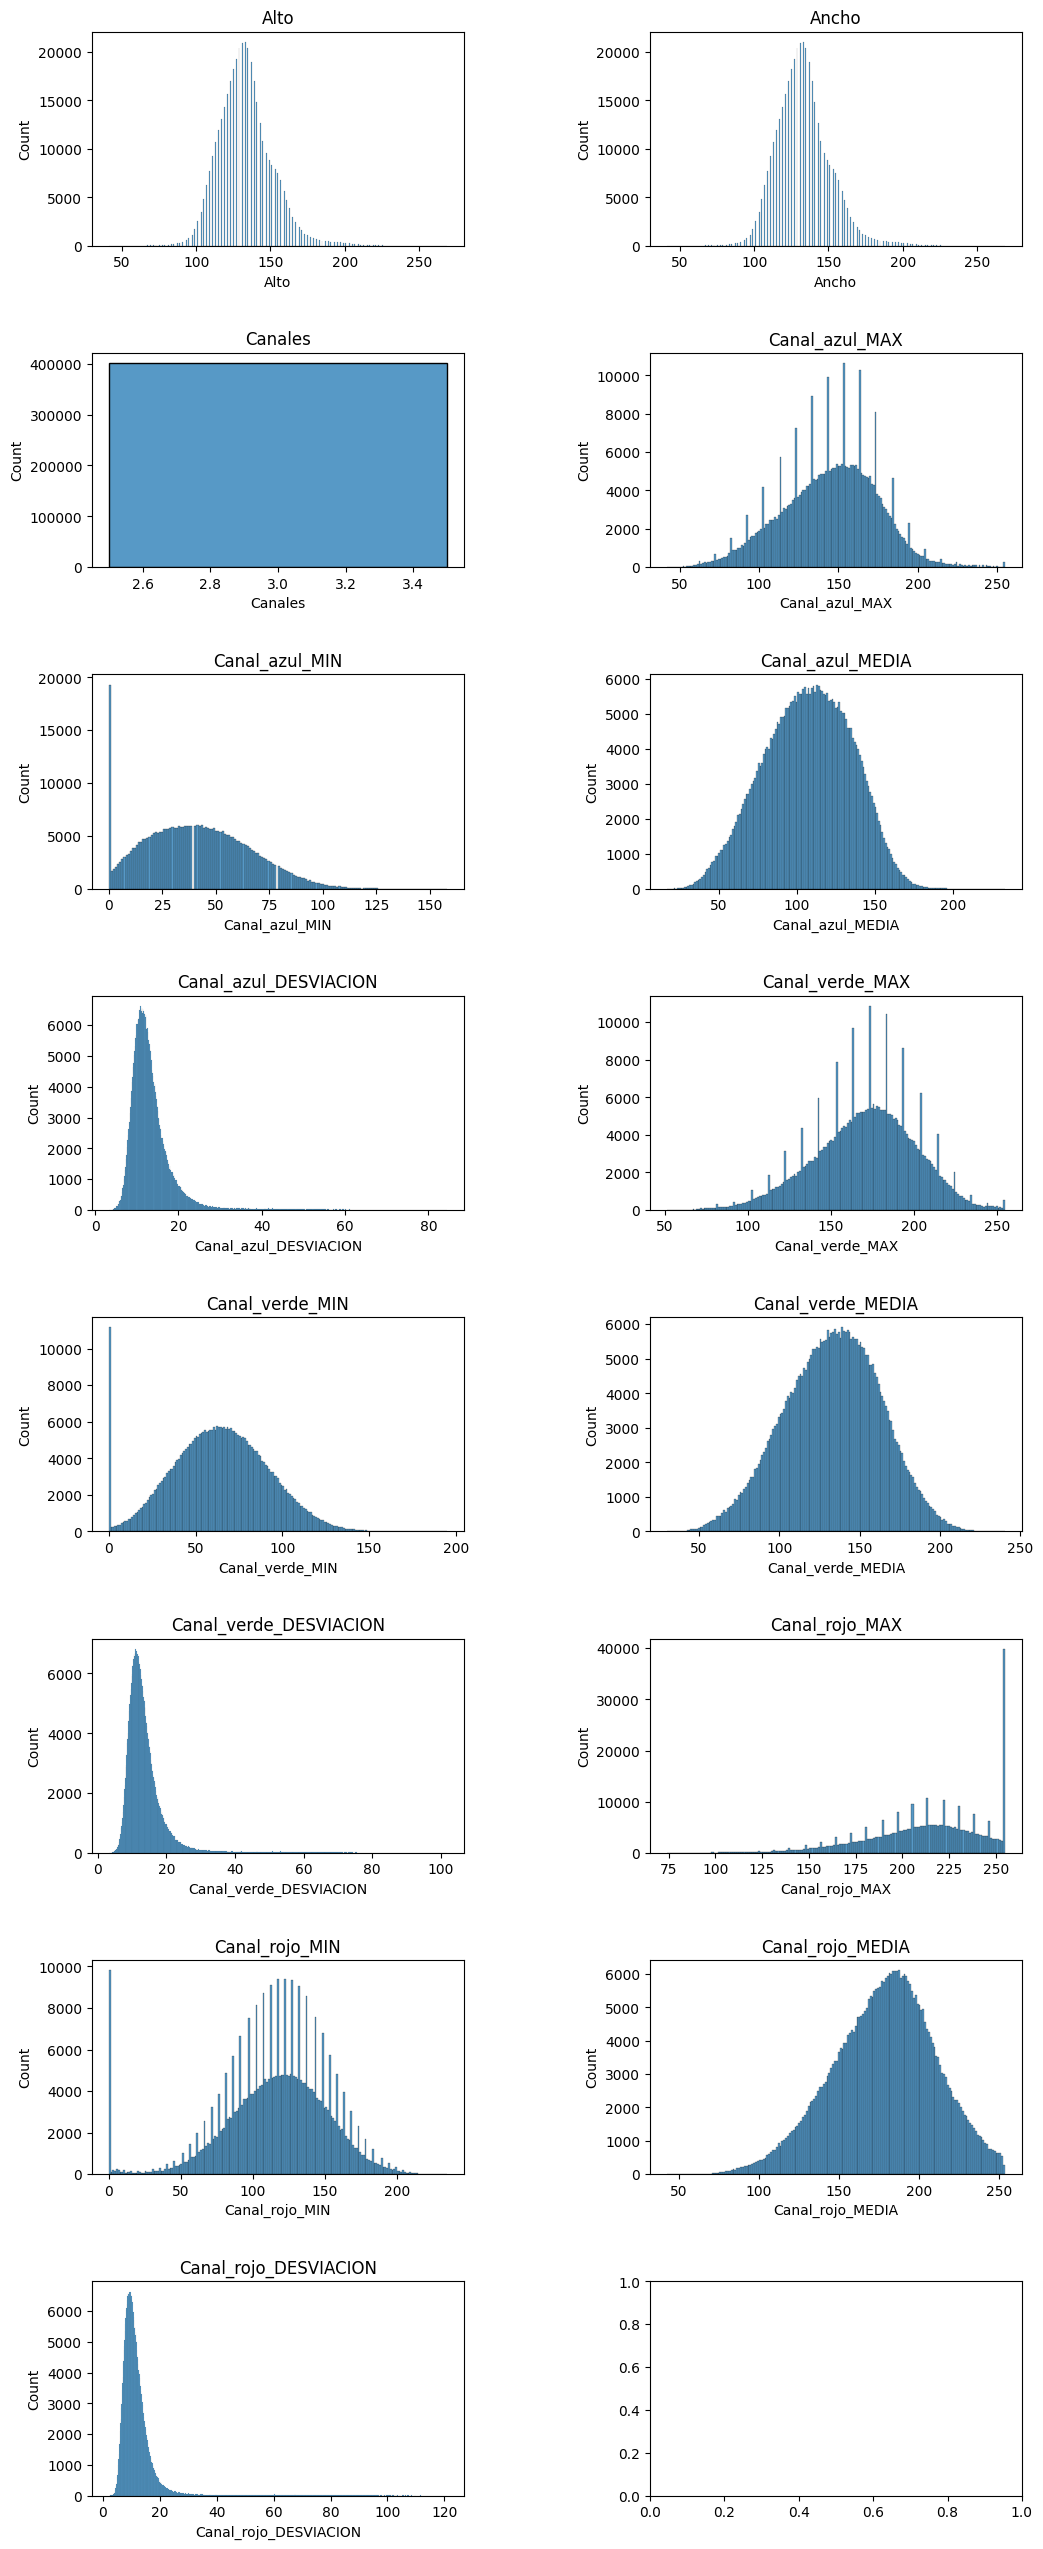

In [6]:
#Numeric variables Histograms

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns

# Calcula el número de filas necesarias
num_rows = (len(num_cols) + 1) // 2

# Configurar columnas y filas de forma dinámica
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

for i, col in enumerate(num_cols):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

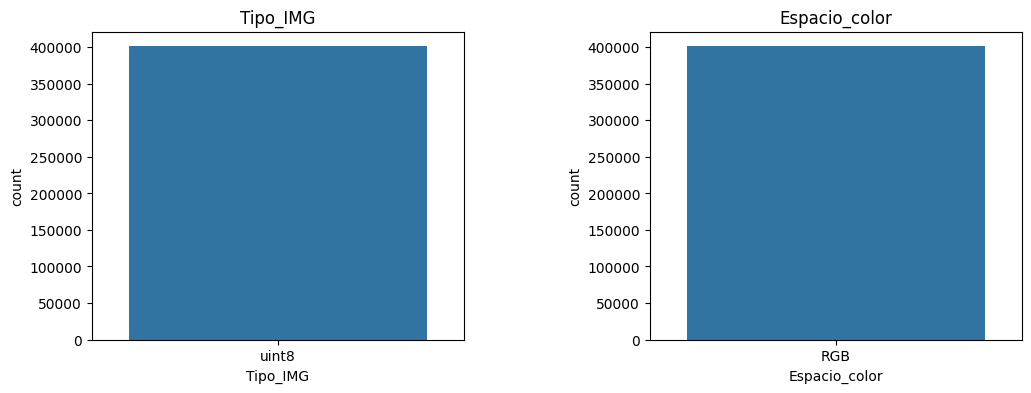

In [7]:
#Non numeric variables representation

cat_cols = ["Tipo_IMG", "Espacio_color"]

# Configurar columnas y filas de forma dinámica
fig, axes = plt.subplots(nrows=len(cat_cols)//2 + len(cat_cols)%2, ncols=2, figsize=(12, 4*((len(cat_cols)+1)//2)))

# Ensure axes is a 2D array
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [24]:
df.describe()

,Alto,Ancho,Canales,Canal_azul_MAX,Canal_azul_MIN,Canal_azul_MEDIA,Canal_azul_DESVIACION,Canal_verde_MAX,Canal_verde_MIN,Canal_verde_MEDIA,Canal_verde_DESVIACION,Canal_rojo_MAX,Canal_rojo_MIN,Canal_rojo_MEDIA,Canal_rojo_DESVIACION
count,401059.000000,401059.000000,401059.0,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000
mean,133.245316,133.245316,3.0,145.059335,40.927412,106.992481,13.549875,170.781232,63.383946,133.069700,14.087448,211.949307,115.870116,178.066435,12.575332
std,18.271392,18.271392,0.0,30.062809,24.231417,27.949531,6.128231,30.459279,27.827906,29.740209,7.414563,30.401861,36.980705,32.032948,9.447576
min,41.000000,41.000000,3.0,42.000000,0.000000,16.474848,3.269018,51.000000,0.000000,29.883197,3.172015,74.000000,0.000000,42.616396,2.047425
25%,121.000000,121.000000,3.0,125.000000,22.000000,87.042275,10.232259,151.000000,45.000000,112.458955,10.352663,193.000000,95.000000,156.893276,8.578143
50%,131.000000,131.000000,3.0,147.000000,40.000000,107.864096,12.228994,173.000000,64.000000,134.065497,12.427389,215.000000,119.000000,179.911693,10.605249
75%,143.000000,143.000000,3.0,166.000000,58.000000,127.845358,14.946706,192.000000,82.000000,154.261386,15.348983,235.000000,141.000000,200.183354,13.386225
max,269.000000,269.000000,3.0,255.000000,158.000000,233.442304,84.464051,255.000000,195.000000,240.402630,101.876671,255.000000,235.000000,253.551680,120.914139


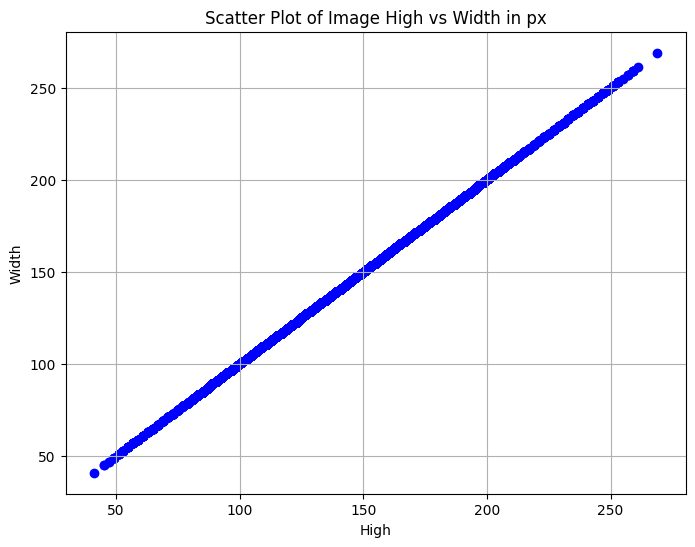

In [25]:
# Scatter plot of high and width
plt.figure(figsize=(8, 6))
plt.scatter(df['Alto'], df['Ancho'], color='blue', marker='o')
plt.title('Scatter Plot of Image High vs Width in px')
plt.xlabel('High')
plt.ylabel('Width')
plt.grid(True)
plt.show()


We can conclude that all of the images are simetrical sin size, however, they are of different sizes -> Important for future Deep Learning Models

## Metadata Dataframe

In [8]:
df_metadata = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')
df_metadata.head(5)

/tmp/ipykernel_33/2377214977.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


### Data Dictonary

| Index | Variable                     | Type     | Meaning                                                                 |
|-------|------------------------------|----------|-------------------------------------------------------------------------|
| 0     | isic_id                      | Object   | Unique case identifier -> Matches with the name of the image file       |
| 1     | target                       | Int64    | Binary class {0: benign, 1: malignant}                                  |
| 2     | patient_id                   | Object   | Unique patient identifier                                               |
| 3     | age_approx                   | Float64  | Approximate age of the patient at time of imaging                       |
| 4     | sex                          | Object   | Sex of the patient                                                      |
| 5     | anatom_site_general          | Object   | General anatomical site of the lesion                                   |
| 6     | clin_size_long_diam_mm       | Float64  | Clinical size of the longest diameter of the lesion in millimeters      |
| 7     | image_type                   | Object   | Structured field of the ISIC Archive for image type                     |
| 8     | tbp_tile_type                | Object   | Lighting modality of the 3D TBP source image                            |
| 9     | tbp_lv_A                     | Float64  | A inside lesion                                                        |
| 10    | tbp_lv_Aext                  | Float64  | A outside lesion                                                       |
| 11    | tbp_lv_B                     | Float64  | B inside lesion                                                        |
| 12    | tbp_lv_Bext                  | Float64  | B outside lesion                                                       |
| 13    | tbp_lv_C                     | Float64  | Chroma inside lesion                                                   |
| 14    | tbp_lv_Cext                  | Float64  | Chroma outside lesion                                                  |
| 15    | tbp_lv_H                     | Float64  | Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown) |
| 16    | tbp_lv_Hext                  | Float64  | Hue outside lesion                                                     |
| 17    | tbp_lv_L                     | Float64  | L inside lesion                                                        |
| 18    | tbp_lv_Lext                  | Float64  | L outside lesion                                                       |
| 19    | tbp_lv_areaMM2               | Float64  | Area of lesion (mm^2)                                                  |
| 20    | tbp_lv_area_perim_ratio      | Float64  | Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10 |
| 21    | tbp_lv_color_std_mean        | Float64  | Color irregularity, calculated as the variance of colors within the lesion's boundary |
| 22    | tbp_lv_deltaA                | Float64  | Average A contrast (inside vs. outside lesion)                         |
| 23    | tbp_lv_deltaB                | Float64  | Average B contrast (inside vs. outside lesion)                         |
| 24    | tbp_lv_deltaL                | Float64  | Average L contrast (inside vs. outside lesion)                         |
| 25    | tbp_lv_deltaLB               | Float64  | Average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25 |
| 26    | tbp_lv_deltaLBnorm           | Float64  | Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment |
| 27    | tbp_lv_eccentricity          | Float64  | Eccentricity                                                           |
| 28    | tbp_lv_location              | Object   | Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds |
| 29    | tbp_lv_location_simple       | Object   | Classification of anatomical location, simple                          |
| 30    | tbp_lv_minorAxisMM           | Float64  | Smallest lesion diameter (mm)                                          |
| 31    | tbp_lv_nevi_confidence       | Float64  | Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist |
| 32    | tbp_lv_norm_border           | Float64  | Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry |
| 33    | tbp_lv_norm_color            | Float64  | Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity |
| 34    | tbp_lv_perimeterMM           | Float64  | Perimeter of lesion (mm)                                               |
| 35    | tbp_lv_radial_color_std_max  | Float64  | Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10 |
| 36    | tbp_lv_stdL                  | Float64  | Standard deviation of L inside lesion                                  |
| 37    | tbp_lv_Lext                  | Float64  | Standard deviation of L outside lesion                                 |
| 38    | tbp_lv_symm_2axis            | Float64  | Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10 |
| 39    | tbp_lv_symm_2axis_angle      | Float64  | Lesion border asymmetry angle                                          |
| 40    | tbp_lv_x                     | Float64  | X-coordinate of the lesion on 3D TBP                                   |
| 41    | tbp_lv_y                     | Float64  | Y-coordinate of the lesion on 3D TBP                                   |
| 42    | tbp_lv_z                     | Float64  | Z-coordinate of the lesion on 3D TBP                                   |
| 43    | attribution                  | Object   | Image attribution, synonymous with image source. The source is the device: Vectra WB360 |
| 44    | license                      | Object   | License of copyright for each image                                    |
| 45    | lesion_id                    | Object   | Unique lesion identifier. Present in lesions that have multiple images |
| 46    | iddx_full                    | Object   | Represents the full diagnosis code or label for the lesion             |
| 47    | iddx_1                       | Object   | Primary diagnosis category                                             |
| 48    | iddx_2                       | Object   | Secondary diagnosis category or sub-type                               |
| 49    | iddx_3                       | Object   | Tertiary diagnosis category or further sub-type                        |
| 50    | iddx_4                       | Object   | Quaternary diagnosis category                                          |
| 51    | iddx_5                       | Object   | Quinary diagnosis category                                             |
| 52    | mel_mitotic_index            | Float64  | The mitotic index for melanoma, which is a measure of how many cells are dividing in the lesion. It's an important factor in determining the aggressiveness of the cancer |
| 53    | mel_thick_mm                 | Float64  | The thickness of the melanoma in millimeters. This is often measured using the Breslow depth, which is a critical factor in staging melanoma and determining prognosis |
| 54    | tbp_lv_dnn_lesion_confidence | Float64  | The confidence score (likely from a deep neural network) that estimates the probability of the lesion being of a specific type. This score is generated by an AI model trained on a large dataset of labeled lesions, similar to the tbp_lv_nevi_confidence |


In [9]:
#Given the meaning of each column, we will change the name for one more meaningfull

new_column_names = {
    'isic_id': 'Unique_case_identifier',
    'target': 'Target',
    'age_approx': 'Approximate_age',
    'sex': 'Patient_sex',
    'anatom_site_general': 'General_anatomical_site',
    'clin_size_long_diam_mm': 'Longest_diameter_mm',
    'image_type': 'Image_type',
    'tbp_tile_type': 'Lighting_modality_3D_TBP',
    'tbp_lv_A': 'A_inside_lesion',
    'tbp_lv_Aext': 'A_outside_lesion',
    'tbp_lv_B': 'B_inside_lesion',
    'tbp_lv_Bext': 'B_outside_lesion',
    'tbp_lv_C': 'C_inside_lesion',
    'tbp_lv_Cext': 'C_outside_lesion',
    'tbp_lv_H': 'Hue_inside_lesion',
    'tbp_lv_Hext': 'Hue_outside_lesion',
    'tbp_lv_L': 'L_inside_lesion',
    'tbp_lv_Lext': 'L_outside_lesion',
    'tbp_lv_areaMM2': 'Lesion_area_mm2',
    'tbp_lv_area_perim_ratio': 'Border_jaggedness_ratio',
    'tbp_lv_color_std_mean': 'Color_irregularity_mean',
    'tbp_lv_deltaA': 'Average_A_contrast',
    'tbp_lv_deltaB': 'Average_B_contrast',
    'tbp_lv_deltaL': 'Average_L_contrast',
    'tbp_lv_deltaLB': 'Average_delta_LB',
    'tbp_lv_deltaLBnorm': 'Contrast_lesion_surrounding_skin',
    'tbp_lv_eccentricity': 'Lesion_eccentricity',
    'tbp_lv_location': 'Anatomical_location',
    'tbp_lv_location_simple': 'Simple_anatomical_location',
    'tbp_lv_minorAxisMM': 'Smallest_diameter_mm',
    'tbp_lv_nevi_confidence': 'Nevus_confidence_score',
    'tbp_lv_norm_border': 'Border_irregularity_normalized',
    'tbp_lv_norm_color': 'Color_variation_normalized',
    'tbp_lv_perimeterMM': 'Lesion_perimeter_mm',
    'tbp_lv_radial_color_std_max': 'Color_asymmetry',
    'tbp_lv_stdL': 'Standard_deviation_L_inside',
    'tbp_lv_Lext': 'Standard_deviation_L_outside',
    'tbp_lv_symm_2axis': 'Border_asymmetry',
    'tbp_lv_symm_2axis_angle': 'Border_asymmetry_angle',
    'tbp_lv_x': 'Lesion_X_coordinate',
    'tbp_lv_y': 'Lesion_Y_coordinate',
    'tbp_lv_z': 'Lesion_Z_coordinate',
    'attribution': 'Image_attribution',
    'license': 'Image_license',
    'lesion_id': 'Unique_lesion_identifier',
    'iddx_full': 'Full_diagnosis_code',
    'iddx_1': 'Primary_diagnosis_category',
    'iddx_2': 'Secondary_diagnosis_category',
    'iddx_3': 'Tertiary_diagnosis_category',
    'iddx_4': 'Quaternary_diagnosis_category',
    'iddx_5': 'Quinary_diagnosis_category',
    'mel_mitotic_index': 'Melanoma_mitotic_index',
    'mel_thick_mm': 'Melanoma_thickness_mm',
    'tbp_lv_dnn_lesion_confidence': 'DNN_lesion_confidence_score'
}

df_metadata.rename(columns=new_column_names, inplace=True)

In [10]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unique_case_identifier            401059 non-null  object 
 1   Target                            401059 non-null  int64  
 2   patient_id                        401059 non-null  object 
 3   Approximate_age                   398261 non-null  float64
 4   Patient_sex                       389542 non-null  object 
 5   General_anatomical_site           395303 non-null  object 
 6   Longest_diameter_mm               401059 non-null  float64
 7   Image_type                        401059 non-null  object 
 8   Lighting_modality_3D_TBP          401059 non-null  object 
 9   A_inside_lesion                   401059 non-null  float64
 10  A_outside_lesion                  401059 non-null  float64
 11  B_inside_lesion                   401059 non-null  f

In [11]:
df_metadata.describe()

,Target,Approximate_age,Longest_diameter_mm,A_inside_lesion,A_outside_lesion,B_inside_lesion,B_outside_lesion,C_inside_lesion,C_outside_lesion,Hue_inside_lesion,...,Color_asymmetry,Standard_deviation_L_inside,tbp_lv_stdLExt,Border_asymmetry,Border_asymmetry_angle,Lesion_X_coordinate,Lesion_Y_coordinate,Lesion_Z_coordinate,Melanoma_thickness_mm,DNN_lesion_confidence_score
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


### Histograms for Continuous Variables

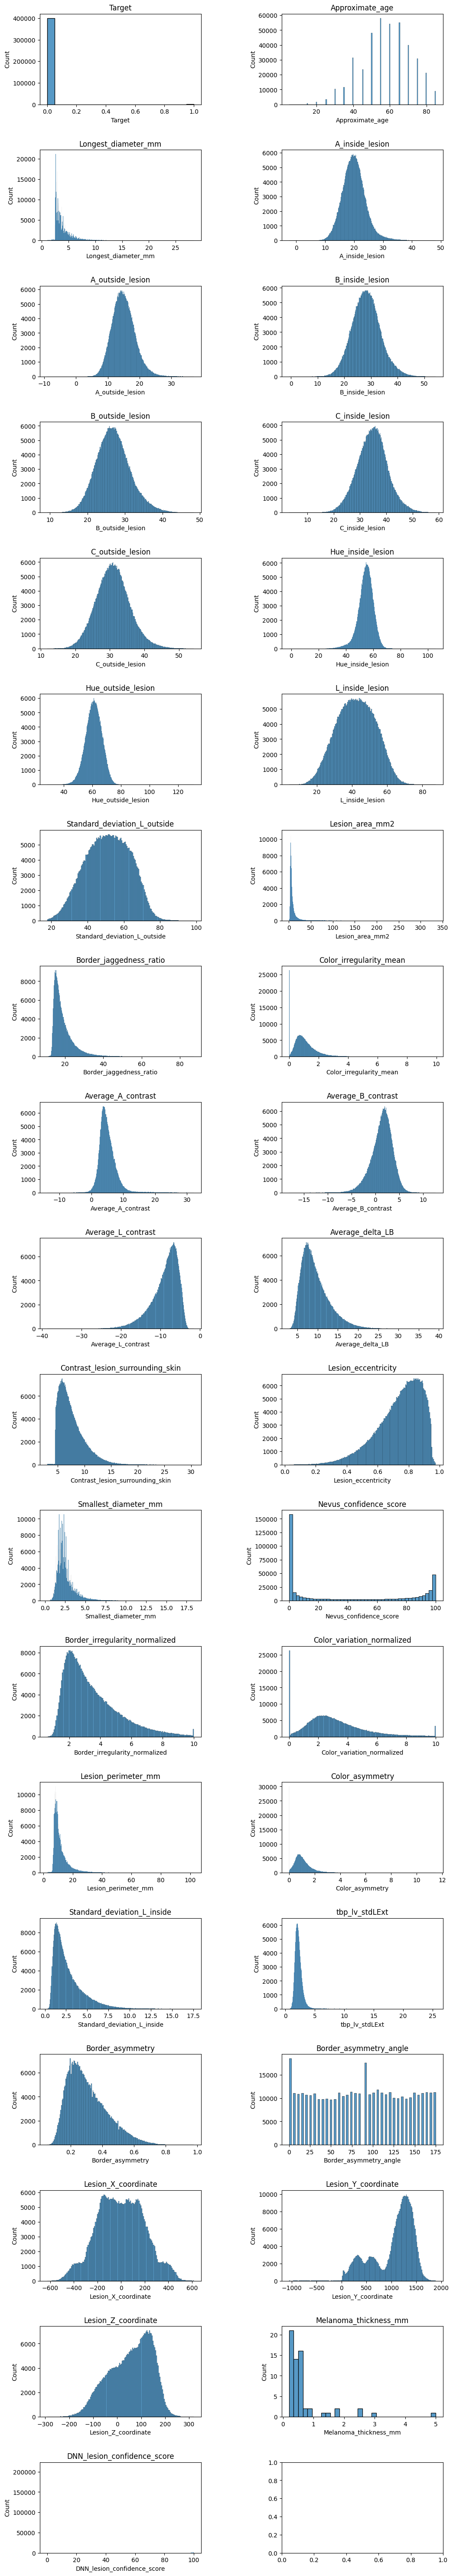

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

num_cols = df_metadata.select_dtypes(include='number').columns

num_rows = (len(num_cols) + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

for i, col in enumerate(num_cols):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df_metadata, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Bar Plots for String Variables

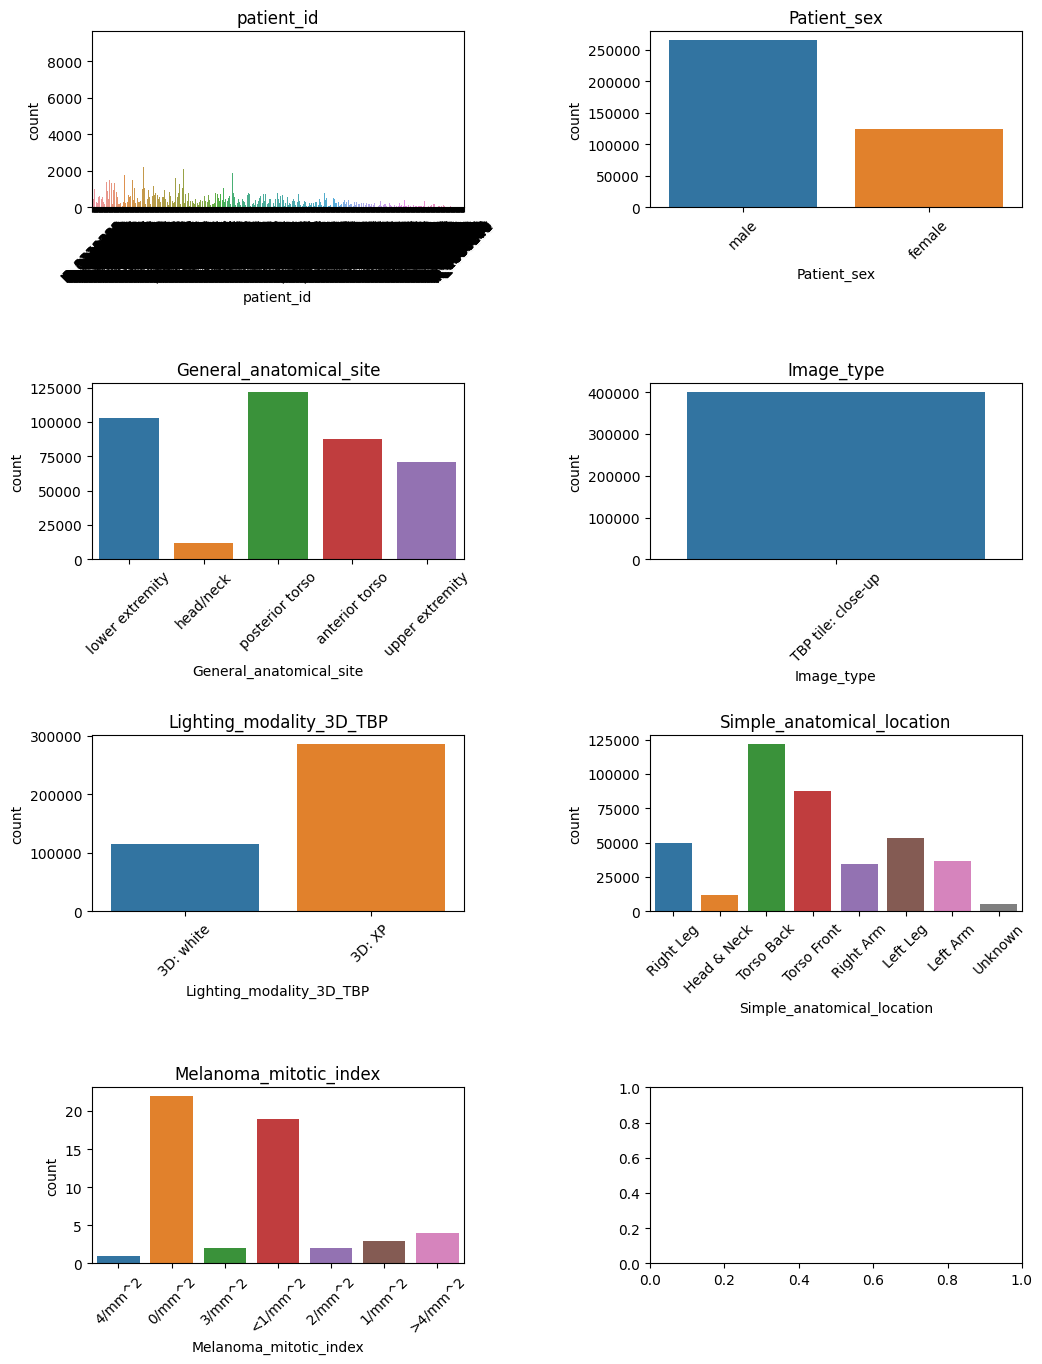

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

cat_cols = ['patient_id', 'Patient_sex',
       'General_anatomical_site', 'Image_type', 'Lighting_modality_3D_TBP',
       'Simple_anatomical_location','Melanoma_mitotic_index']

fig, axes = plt.subplots(nrows=len(cat_cols)//2 + len(cat_cols)%2, ncols=2, figsize=(12, 4*((len(cat_cols)+1)//2)))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_metadata, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45) 

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

#### Variables based on Dignosis Category

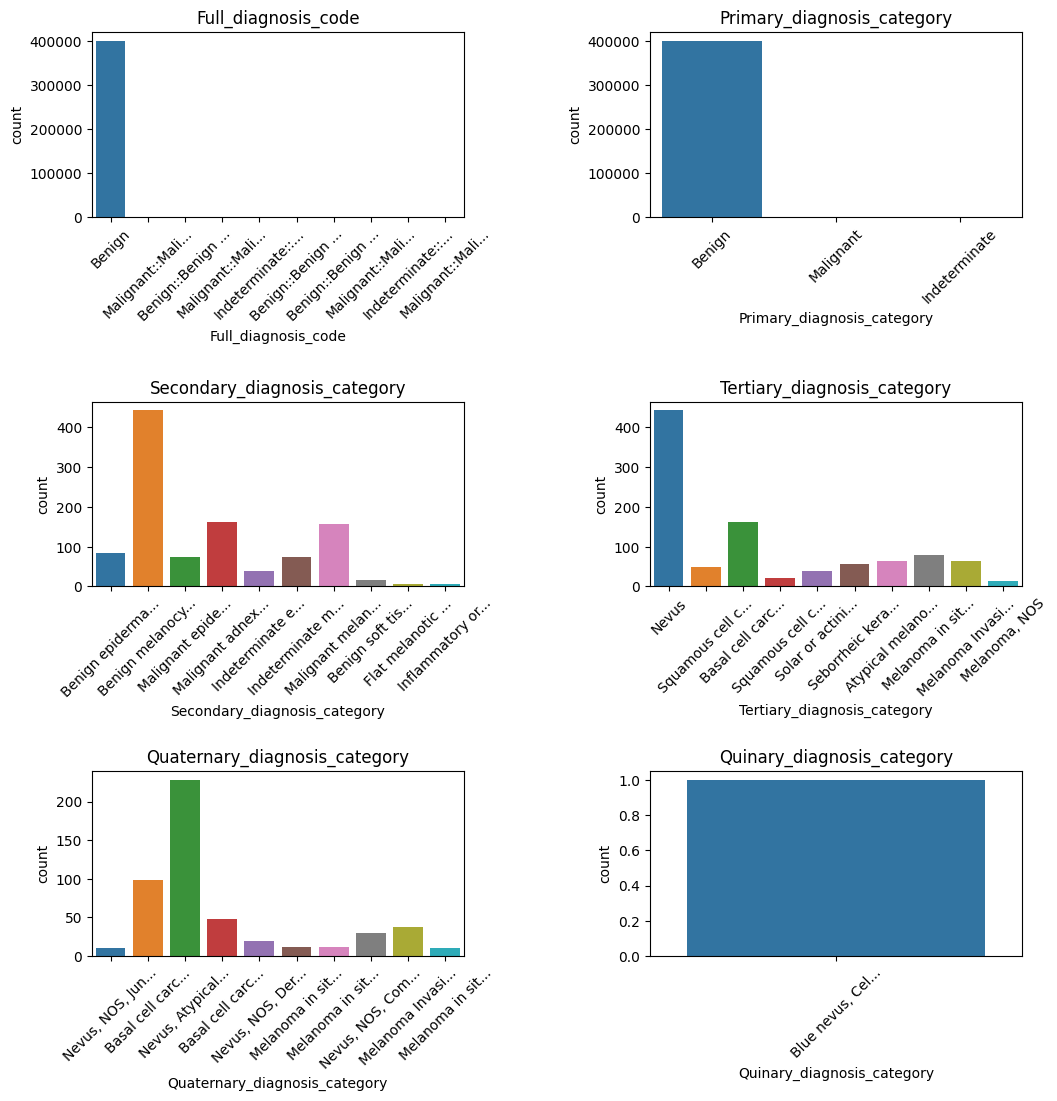

In [14]:
diagnostic_cols = ['Full_diagnosis_code', 'Primary_diagnosis_category',
       'Secondary_diagnosis_category', 'Tertiary_diagnosis_category',
       'Quaternary_diagnosis_category', 'Quinary_diagnosis_category']

fig, axes = plt.subplots(nrows=len(diagnostic_cols)//2 + len(diagnostic_cols)%2, ncols=2, figsize=(12, 4*((len(diagnostic_cols)+1)//2)))
axes = axes.flatten()

for i, col in enumerate(diagnostic_cols):
    # Top 10 values
    top10 = df_metadata[col].value_counts().nlargest(10).index
    top10_data = df_metadata[df_metadata[col].isin(top10)]
    
    sns.countplot(data=top10_data, x=col, ax=axes[i])
    axes[i].set_title(col)
    
    # Modify x-axis labels
    new_labels = [label.get_text()[:15] + '...' if len(label.get_text()) > 15 else label.get_text() for label in axes[i].get_xticklabels()]
    axes[i].set_xticklabels(new_labels, rotation=45)
    
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()


# Null Report - Data Quality

In [15]:
null_counts = df_metadata.isnull().sum()
print(null_counts)

Unique_case_identifier                   0
Target                                   0
patient_id                               0
Approximate_age                       2798
Patient_sex                          11517
General_anatomical_site               5756
Longest_diameter_mm                      0
Image_type                               0
Lighting_modality_3D_TBP                 0
A_inside_lesion                          0
A_outside_lesion                         0
B_inside_lesion                          0
B_outside_lesion                         0
C_inside_lesion                          0
C_outside_lesion                         0
Hue_inside_lesion                        0
Hue_outside_lesion                       0
L_inside_lesion                          0
Standard_deviation_L_outside             0
Lesion_area_mm2                          0
Border_jaggedness_ratio                  0
Color_irregularity_mean                  0
Average_A_contrast                       0
Average_B_c

In [16]:
null_percentage = (df_metadata.isnull().sum() / len(df_metadata)) * 100
print(null_percentage)

Unique_case_identifier               0.000000
Target                               0.000000
patient_id                           0.000000
Approximate_age                      0.697653
Patient_sex                          2.871647
General_anatomical_site              1.435200
Longest_diameter_mm                  0.000000
Image_type                           0.000000
Lighting_modality_3D_TBP             0.000000
A_inside_lesion                      0.000000
A_outside_lesion                     0.000000
B_inside_lesion                      0.000000
B_outside_lesion                     0.000000
C_inside_lesion                      0.000000
C_outside_lesion                     0.000000
Hue_inside_lesion                    0.000000
Hue_outside_lesion                   0.000000
L_inside_lesion                      0.000000
Standard_deviation_L_outside         0.000000
Lesion_area_mm2                      0.000000
Border_jaggedness_ratio              0.000000
Color_irregularity_mean           

1. Given the amount of null values in some columns: ["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"], which is a lot (Surpassing the 90%), the columns must be deleted.

2. Given that the amounts of null values for columns "Approximate_age", "Patient_sex" and "General_anatomical_site" are insignificant (Not surpassing even the 10% of the total data), the best we can do is delete this null values to avoid noise in the ML or Deep Learning Model

**When deleting the null registers keep in mind the proprotion of the column "Target". In the best case none of the 1 values are eliminated -> Keep in mind the impact**



# Null Treatment - Experimental (Deleat null <90% and deleate null registers >5%) 

## Deleate columns that surpass the 90% of null registers

In [17]:
df_limp_columns = df_metadata.drop(columns=["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"])

df_limp_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unique_case_identifier            401059 non-null  object 
 1   Target                            401059 non-null  int64  
 2   patient_id                        401059 non-null  object 
 3   Approximate_age                   398261 non-null  float64
 4   Patient_sex                       389542 non-null  object 
 5   General_anatomical_site           395303 non-null  object 
 6   Longest_diameter_mm               401059 non-null  float64
 7   Image_type                        401059 non-null  object 
 8   Lighting_modality_3D_TBP          401059 non-null  object 
 9   A_inside_lesion                   401059 non-null  float64
 10  A_outside_lesion                  401059 non-null  float64
 11  B_inside_lesion                   401059 non-null  f

## Deleate some columns that contain useless info

Given that the information in the columns ["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP"] contain useless info, we would also eliminate these columns

Also, there are a lot of columns referencing anatomical location, which is redundant, so we will use only one column **General_anatomical_site**, the rest will be deleated

In [18]:
df_limp = df_limp_columns.drop(columns=["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP","Anatomical_location","Simple_anatomical_location"])
df_limp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unique_case_identifier            401059 non-null  object 
 1   Target                            401059 non-null  int64  
 2   patient_id                        401059 non-null  object 
 3   Approximate_age                   398261 non-null  float64
 4   Patient_sex                       389542 non-null  object 
 5   General_anatomical_site           395303 non-null  object 
 6   Longest_diameter_mm               401059 non-null  float64
 7   A_inside_lesion                   401059 non-null  float64
 8   A_outside_lesion                  401059 non-null  float64
 9   B_inside_lesion                   401059 non-null  float64
 10  B_outside_lesion                  401059 non-null  float64
 11  C_inside_lesion                   401059 non-null  f

## Deleate null resgisters

In [19]:
columns_to_check = ["Approximate_age","Patient_sex","General_anatomical_site"]
df_clean = df_limp.dropna(subset=columns_to_check)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381914 entries, 0 to 401058
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unique_case_identifier            381914 non-null  object 
 1   Target                            381914 non-null  int64  
 2   patient_id                        381914 non-null  object 
 3   Approximate_age                   381914 non-null  float64
 4   Patient_sex                       381914 non-null  object 
 5   General_anatomical_site           381914 non-null  object 
 6   Longest_diameter_mm               381914 non-null  float64
 7   A_inside_lesion                   381914 non-null  float64
 8   A_outside_lesion                  381914 non-null  float64
 9   B_inside_lesion                   381914 non-null  float64
 10  B_outside_lesion                  381914 non-null  float64
 11  C_inside_lesion                   381914 non-null  float6

### Verification or proportions and Nulls

In [20]:
#First we need to see the state of the proprotion of registers in 'target' column
df_metadata['Target'].value_counts()

Target
0    400666
1       393
Name: count, dtype: int64

In [21]:
#First we need to see the state of the proprotion of registers in 'target' column
df_clean['Target'].value_counts()

Target
0    381533
1       381
Name: count, dtype: int64

In [22]:
null_counts = df_clean.isnull().sum()
print(null_counts)

Unique_case_identifier              0
Target                              0
patient_id                          0
Approximate_age                     0
Patient_sex                         0
General_anatomical_site             0
Longest_diameter_mm                 0
A_inside_lesion                     0
A_outside_lesion                    0
B_inside_lesion                     0
B_outside_lesion                    0
C_inside_lesion                     0
C_outside_lesion                    0
Hue_inside_lesion                   0
Hue_outside_lesion                  0
L_inside_lesion                     0
Standard_deviation_L_outside        0
Lesion_area_mm2                     0
Border_jaggedness_ratio             0
Color_irregularity_mean             0
Average_A_contrast                  0
Average_B_contrast                  0
Average_L_contrast                  0
Average_delta_LB                    0
Contrast_lesion_surrounding_skin    0
Lesion_eccentricity                 0
Smallest_dia

# Final Code Snippet

Given the results where the proprotion in the column 'target' isn't compromised and the columns deleated doesn't afect in a negative way the completion of information given to resolve the problem, the final decision is to stick with the following configuration:

In [23]:
#The following code snippet will clean the dataframe as the stated in this notebook
'''
#Delate columns with no information
df_limp_columns = df_metadata.drop(columns=["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"])

#Deleate useless columns
df_limp = df_limp_columns.drop(columns=["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP","Anatomical_location","Simple_anatomical_location"])


#Clear registers with null values in the columns that contain less than 10%
columns_to_check = ["Approximate_age","Patient_sex","General_anatomical_site"]
df_clean = df_limp.dropna(subset=columns_to_check)
df_clean.info()
'''

'\n#Delate columns with no information\ndf_limp_columns = df_metadata.drop(columns=["Unique_lesion_identifier","Secondary_diagnosis_category","Tertiary_diagnosis_category","Quaternary_diagnosis_category","Quinary_diagnosis_category","Melanoma_mitotic_index","Melanoma_thickness_mm"])\n\n#Deleate useless columns\ndf_limp = df_limp_columns.drop(columns=["copyright_license","Image_attribution","Image_type", "Lighting_modality_3D_TBP","Anatomical_location","Simple_anatomical_location"])\n\n\n#Clear registers with null values in the columns that contain less than 10%\ncolumns_to_check = ["Approximate_age","Patient_sex","General_anatomical_site"]\ndf_clean = df_limp.dropna(subset=columns_to_check)\ndf_clean.info()\n'